# K-means e KNN

- O objetivo deste notebook é um pequeno exemplo de uso dos algoritmos
- Não será dado foco na escolha de features ou limpeza dados, visando dar ênfase
na demonstração da aplicação de forma simplificada.

In [1]:
import io
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Pré processamento
- Vamos eliminar os valores vazios e criar dois dataframes, um para cada técnica

In [2]:
pinguins = requests.get('https://raw.githubusercontent.com/ThiagoOliveira001/learningIA/main/IA2A2/KNN_KMEANS/penguins.csv').content

In [3]:
df = pd.read_csv(io.StringIO(pinguins.decode('utf-8')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [6]:
df = df[['bill_length_mm', 'flipper_length_mm','species']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   flipper_length_mm  342 non-null    float64
 2   species            344 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.2+ KB


In [7]:
df.dropna(inplace=True, axis=0)

df_kmeans = df[['bill_length_mm', 'flipper_length_mm']].copy()
df_knn = df[['bill_length_mm', 'flipper_length_mm', 'species']].copy()

### K-means
- No exemplo abaixo será usado o método de elbow, entretanto existem outras abordagens que podem ser seguidas. 

#### Colocando os dados em escala

In [8]:
scaler = StandardScaler()
df_kmeans_sc = scaler.fit_transform(df_kmeans)

#### Elbow method

Aqui conseguimos ver que o número de cluster indicado é três, vamos demonstrar abaixo a diferença entre a execução com 3 clusters.

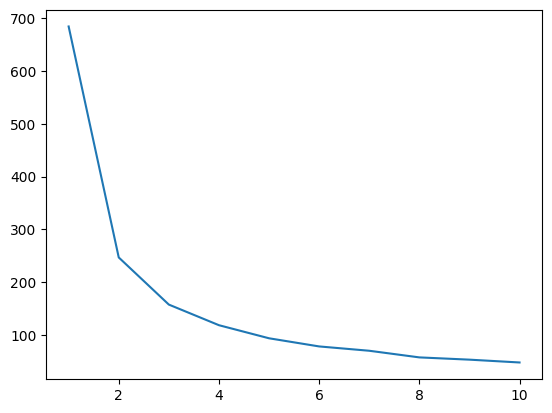

In [9]:
wcss_sc = []

for i in range(1, 11):
    clustering_sc = KMeans(n_clusters=i, init='k-means++', n_init="auto", random_state=42)
    clustering_sc.fit(df_kmeans_sc)
    wcss_sc.append(clustering_sc.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss_sc);

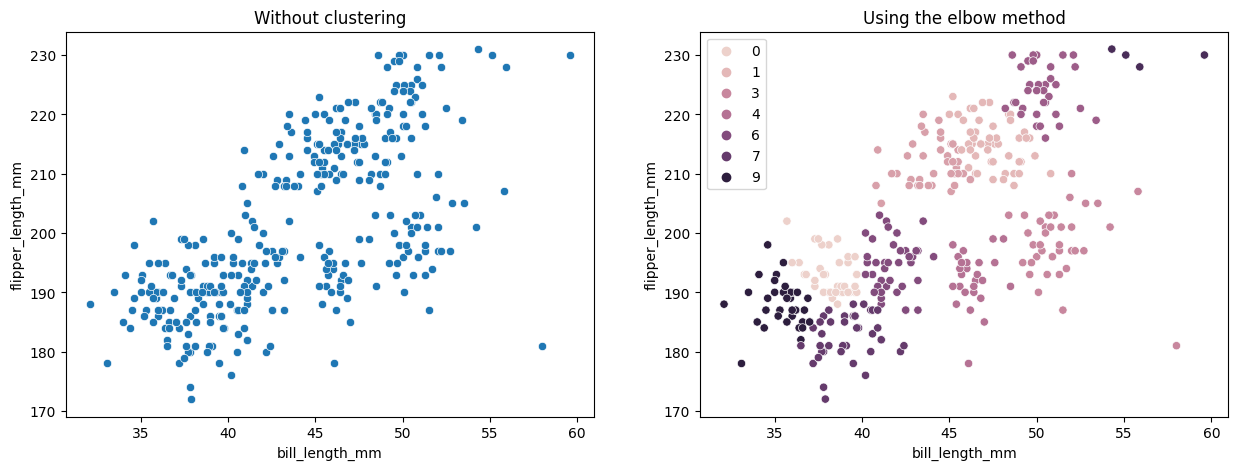

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='bill_length_mm', y='flipper_length_mm').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_kmeans, x='bill_length_mm', y='flipper_length_mm', hue=clustering_sc.labels_).set_title('Using the elbow method');

##### Executando com 3 clusters

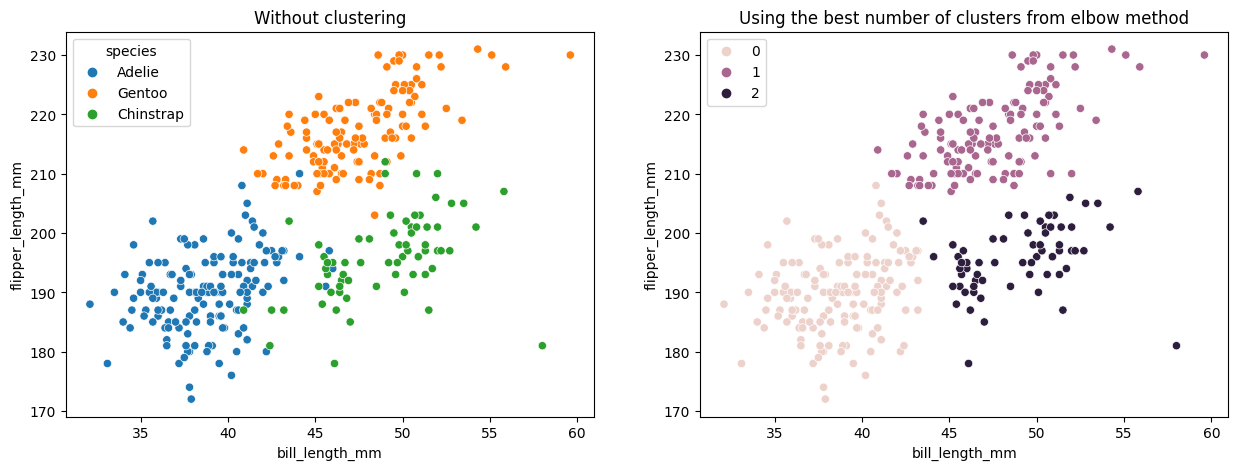

In [11]:
clustering_final = KMeans(n_clusters=3, init='k-means++', n_init="auto", random_state=42)
clustering_final.fit(df_kmeans_sc)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='bill_length_mm', y='flipper_length_mm', hue='species').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_kmeans, x='bill_length_mm', y='flipper_length_mm', hue=clustering_final.labels_).set_title('Using the best number of clusters from elbow method');

### KNN

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [13]:
df_knn['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [14]:
species_to_number = {
    'Adelie': 1,
    'Gentoo': 2,
    'Chinstrap': 3,
}
df_knn['species'] = df_knn['species'].apply(lambda x: species_to_number[x])

In [15]:
df_knn_sc = scaler.fit_transform(df_knn[['bill_length_mm','flipper_length_mm']])

In [16]:
df_knn_sc

array([[-0.88449874, -1.41834665],
       [-0.81112573, -1.06225022],
       [-0.66437972, -0.42127665],
       [-1.32473679, -0.56371522],
       [-0.84781224, -0.77737308],
       [-0.92118525, -1.41834665],
       [-0.86615549, -0.42127665],
       [-1.80166135, -0.56371522],
       [-0.35254443, -0.77737308],
       [-1.12296102, -1.06225022],
       [-1.12296102, -1.48956593],
       [-0.5176337 , -1.34712736],
       [-0.976215  , -0.70615379],
       [-1.70994508, -0.20761879],
       [-1.34308004, -1.13346951],
       [-0.95787175, -0.42127665],
       [-0.26082817, -0.27883808],
       [-1.74663159, -1.20468879],
       [ 0.38118565, -0.49249594],
       [-1.12296102, -1.91688165],
       [-1.14130427, -1.48956593],
       [-1.47148281, -0.84859236],
       [-1.04958801, -1.13346951],
       [-0.9395285 , -1.48956593],
       [-1.58154232, -0.99103094],
       [-0.60934996, -1.27590808],
       [-0.62769321, -0.99103094],
       [-1.10461777, -2.05932022],
       [-0.62769321,

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
   df_knn_sc, df_knn['species'].values, test_size=0.2, random_state=42
)

#### Vamos usar 3 como quantidade de vizinhos, para um teste inicial

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn_model.predict(X_test)

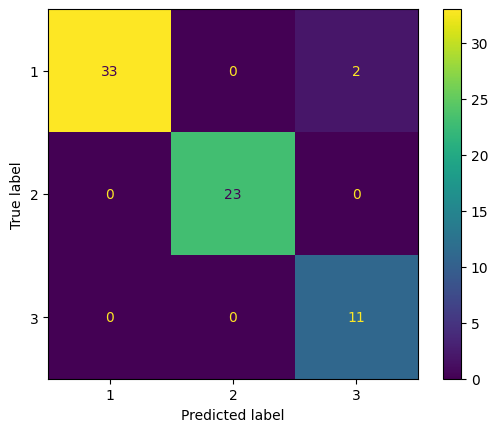

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)

disp.plot()
plt.show()

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100)}%")

Accuracy: 97%


#### 97% de acurácia
Observamos acima que o modelo perfomou bem, o KNN por padrão usa a distância euclidiana, mas pode ser configurado para usar outras distâncias.